In [1]:
from rustyspikes import *

In [2]:
def coder(stimulus_size=5, refresh_time=150, aw=4):
    model = SNNModel()
    inputs = []
    layer = []
    hidden = []
    for i in range(stimulus_size):
        neu = Spikes_at_will(refresh_time=refresh_time, awaiting_time=i*aw, id=i)
        inputs.append(neu)
        model.add_neuron(neu)
    for j in range(stimulus_size, stimulus_size*2):
        neu = Izhikevich(id=j)
        layer.append(neu)
        model.add_neuron(neu)
    for j in range(stimulus_size*2, stimulus_size*3):
        neu = Izhikevich(id=j)
        hidden.append(neu)
        model.add_neuron(neu)
    for i in range(stimulus_size):
        syn = Synapse(inputs[i], layer[i], w=1)
        model.add_synapse(syn)
    for i in range(stimulus_size-1):
        syn = Synapse(hidden[i], hidden[i+1], w=1)
        model.add_synapse(syn)
    for i in range(stimulus_size):
        syn = Synapse(layer[i], hidden[i], w=1)
        model.add_synapse(syn)
        syn = Synapse(hidden[i], layer[i], w=1)
        model.add_synapse(syn)
    model.reload_graph()
    return model


def fc_coder(stimulus_size=5, refresh_time=150, aw=4):
    model = SNNModel()
    inputs = []
    layer = []
    hidden = []
    for i in range(stimulus_size):
        neu = Spikes_at_will(refresh_time=refresh_time, awaiting_time=i*aw, id=i)
        inputs.append(neu)
        model.add_neuron(neu)
    for j in range(stimulus_size, stimulus_size*2):
        neu = Izhikevich(id=j)
        layer.append(neu)
        model.add_neuron(neu)
    for j in range(stimulus_size*2, stimulus_size*3):
        neu = Izhikevich(id=j)
        hidden.append(neu)
        model.add_neuron(neu)
    for i in range(stimulus_size):
        syn = Synapse(inputs[i], layer[i], w=1)
        model.add_synapse(syn)
    for i in range(stimulus_size-1):
        syn = Synapse(hidden[i], hidden[i+1], w=1)
        model.add_synapse(syn)
        syn = Synapse(hidden[i+1], hidden[i], w=1)
        model.add_synapse(syn)
    for i in range(stimulus_size-1):
        syn = Synapse(layer[i], layer[i+1], w=1)
        model.add_synapse(syn)
        syn = Synapse(layer[i+1], layer[i], w=1)
        model.add_synapse(syn)
    for i in range(stimulus_size):
        syn = Synapse(layer[i], hidden[i], w=1)
        model.add_synapse(syn)
        syn = Synapse(hidden[i], layer[i], w=1)
        model.add_synapse(syn)
    model.reload_graph()
    return model

Loaded the following model:
{'Neurons': {0: <neurons.Spikes_at_will object at 0x0000019AE3B040D0>, 1: <neurons.Spikes_at_will object at 0x0000019AE3B06690>, 2: <neurons.Spikes_at_will object at 0x0000019AE3B06C50>, 3: <neurons.Spikes_at_will object at 0x0000019AE3B05990>, 4: <neurons.Spikes_at_will object at 0x0000019AE3B04050>, 5: <neurons.Izhikevich object at 0x0000019AE3B05350>, 6: <neurons.Izhikevich object at 0x0000019AE3B070D0>, 7: <neurons.Izhikevich object at 0x0000019AE3B059D0>, 8: <neurons.Izhikevich object at 0x0000019AE3B052D0>, 9: <neurons.Izhikevich object at 0x0000019AE3B05310>, 10: <neurons.Izhikevich object at 0x0000019AE3B04550>, 11: <neurons.Izhikevich object at 0x0000019AE3B05410>, 12: <neurons.Izhikevich object at 0x0000019AE3B06090>, 13: <neurons.Izhikevich object at 0x0000019AE3B05550>, 14: <neurons.Izhikevich object at 0x0000019AE3B055D0>}, 'Synapses': {(0, 5): <synaptics.Synapse object at 0x0000019AE3B06010>, (1, 6): <synaptics.Synapse object at 0x0000019AE3B04

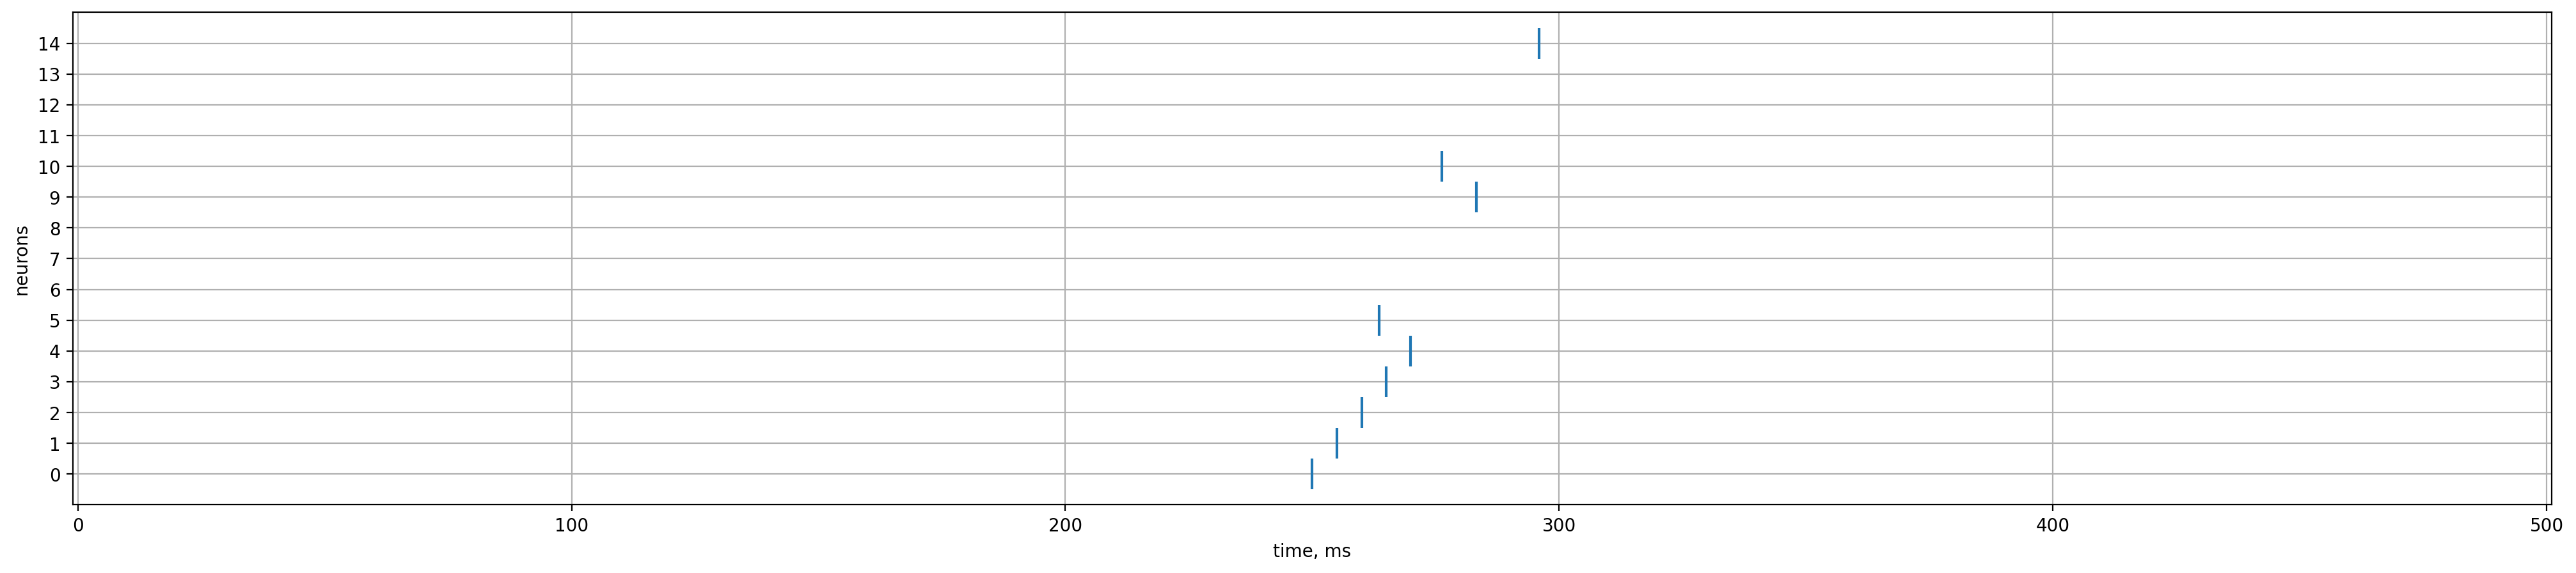

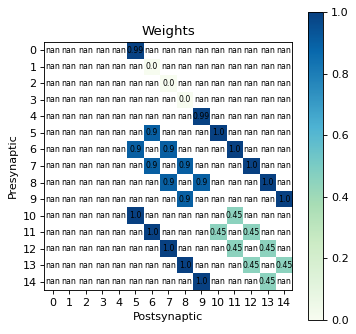

In [53]:
model = load_model('models/apparent.pkl')
time = 500

in_between_w = 1
layer_w = .9
dropout_ws = 0
hidden_w = .45

for i in range(model.num_neurons()):
    model[i].synaptic_limit = 1

model.syn_by_edge[1,6].w = dropout_ws
model.syn_by_edge[2,7].w = dropout_ws
model.syn_by_edge[3,8].w = dropout_ws

model.syn_by_edge[9,14].w = in_between_w
model.syn_by_edge[8,13].w = in_between_w
model.syn_by_edge[7,12].w = in_between_w
model.syn_by_edge[6,11].w = in_between_w
model.syn_by_edge[5,10].w = in_between_w
model.syn_by_edge[14,9].w = in_between_w
model.syn_by_edge[13,8].w = in_between_w
model.syn_by_edge[12,7].w = in_between_w
model.syn_by_edge[11,6].w = in_between_w
model.syn_by_edge[10,5].w = in_between_w

model.syn_by_edge[5,6].w = layer_w
model.syn_by_edge[6,7].w = layer_w
model.syn_by_edge[7,8].w = layer_w
model.syn_by_edge[8,9].w = layer_w
model.syn_by_edge[6,5].w = layer_w
model.syn_by_edge[7,6].w = layer_w
model.syn_by_edge[8,7].w = layer_w
model.syn_by_edge[9,8].w = layer_w

model.syn_by_edge[10,11].w = hidden_w
model.syn_by_edge[11,12].w = hidden_w
model.syn_by_edge[12,13].w = hidden_w
model.syn_by_edge[13,14].w = hidden_w
model.syn_by_edge[11,10].w = hidden_w
model.syn_by_edge[12,11].w = hidden_w
model.syn_by_edge[13,12].w = hidden_w
model.syn_by_edge[14,13].w = hidden_w

#model.syn_by_edge[3,8].w = 1
#model.set_scale(3.9)
model.set_rule_to_all(None)
gatherer = Gatherer(model)
for i in range(int(time / res)):
    model.tick()
    gatherer.gather_spikes_only()
data = gatherer.convert_spikes_for_raster()

gatherer.draw_raster(time=time)
draw_weight_matrix(model)

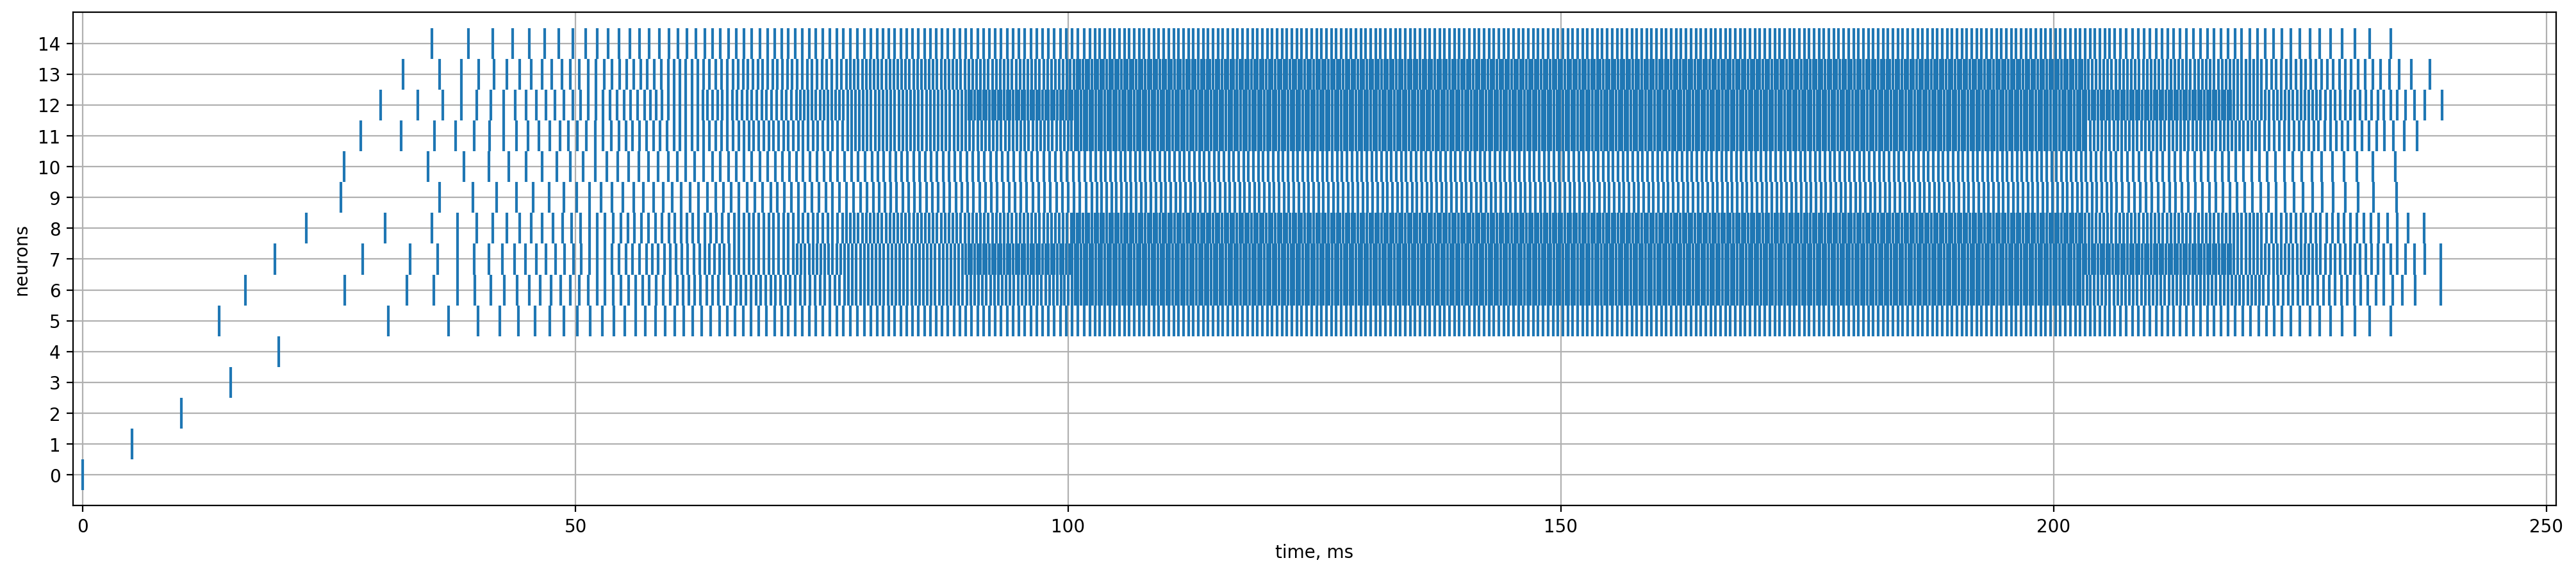

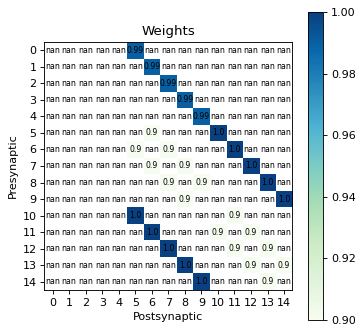

In [67]:
time = 250
refresh_time = 500
aw = 5
model = fc_coder(stimulus_size=5, refresh_time=refresh_time, aw=aw)

stimulus_w = .99
in_between_w = 1
dropout_ws = stimulus_w * 1
hidden_w = .9
layer_w = .9

model.syn_by_edge[0,5].w = stimulus_w
model.syn_by_edge[4,9].w = stimulus_w

model.syn_by_edge[1,6].w = dropout_ws
model.syn_by_edge[2,7].w = dropout_ws
model.syn_by_edge[3,8].w = dropout_ws

model.syn_by_edge[9,14].w = in_between_w
model.syn_by_edge[8,13].w = in_between_w
model.syn_by_edge[7,12].w = in_between_w
model.syn_by_edge[6,11].w = in_between_w
model.syn_by_edge[5,10].w = in_between_w
model.syn_by_edge[14,9].w = in_between_w
model.syn_by_edge[13,8].w = in_between_w
model.syn_by_edge[12,7].w = in_between_w
model.syn_by_edge[11,6].w = in_between_w
model.syn_by_edge[10,5].w = in_between_w

model.syn_by_edge[5,6].w = layer_w
model.syn_by_edge[6,7].w = layer_w
model.syn_by_edge[7,8].w = layer_w
model.syn_by_edge[8,9].w = layer_w
model.syn_by_edge[6,5].w = layer_w
model.syn_by_edge[7,6].w = layer_w
model.syn_by_edge[8,7].w = layer_w
model.syn_by_edge[9,8].w = layer_w

model.syn_by_edge[10,11].w = hidden_w
model.syn_by_edge[11,12].w = hidden_w
model.syn_by_edge[12,13].w = hidden_w
model.syn_by_edge[13,14].w = hidden_w
model.syn_by_edge[11,10].w = hidden_w
model.syn_by_edge[12,11].w = hidden_w
model.syn_by_edge[13,12].w = hidden_w
model.syn_by_edge[14,13].w = hidden_w


#model.syn_by_edge[5,6].w = 0
#model.syn_by_edge[2,7].w = 0
#model.syn_by_edge[3,8].w = 0   4.96905


model.set_scale(5.1)
model.set_rule_to_all(None)
gatherer = Gatherer(model)
for i in range(int(time / res)):
    model.tick()
    gatherer.gather_spikes_only()
data = gatherer.convert_spikes_for_raster()


fwidth=25
fheight=5
dpi=200
gatherer.draw_raster(time=time)

draw_weight_matrix(model, dpi=80, fontsize=7, nan_for_abscence=True)

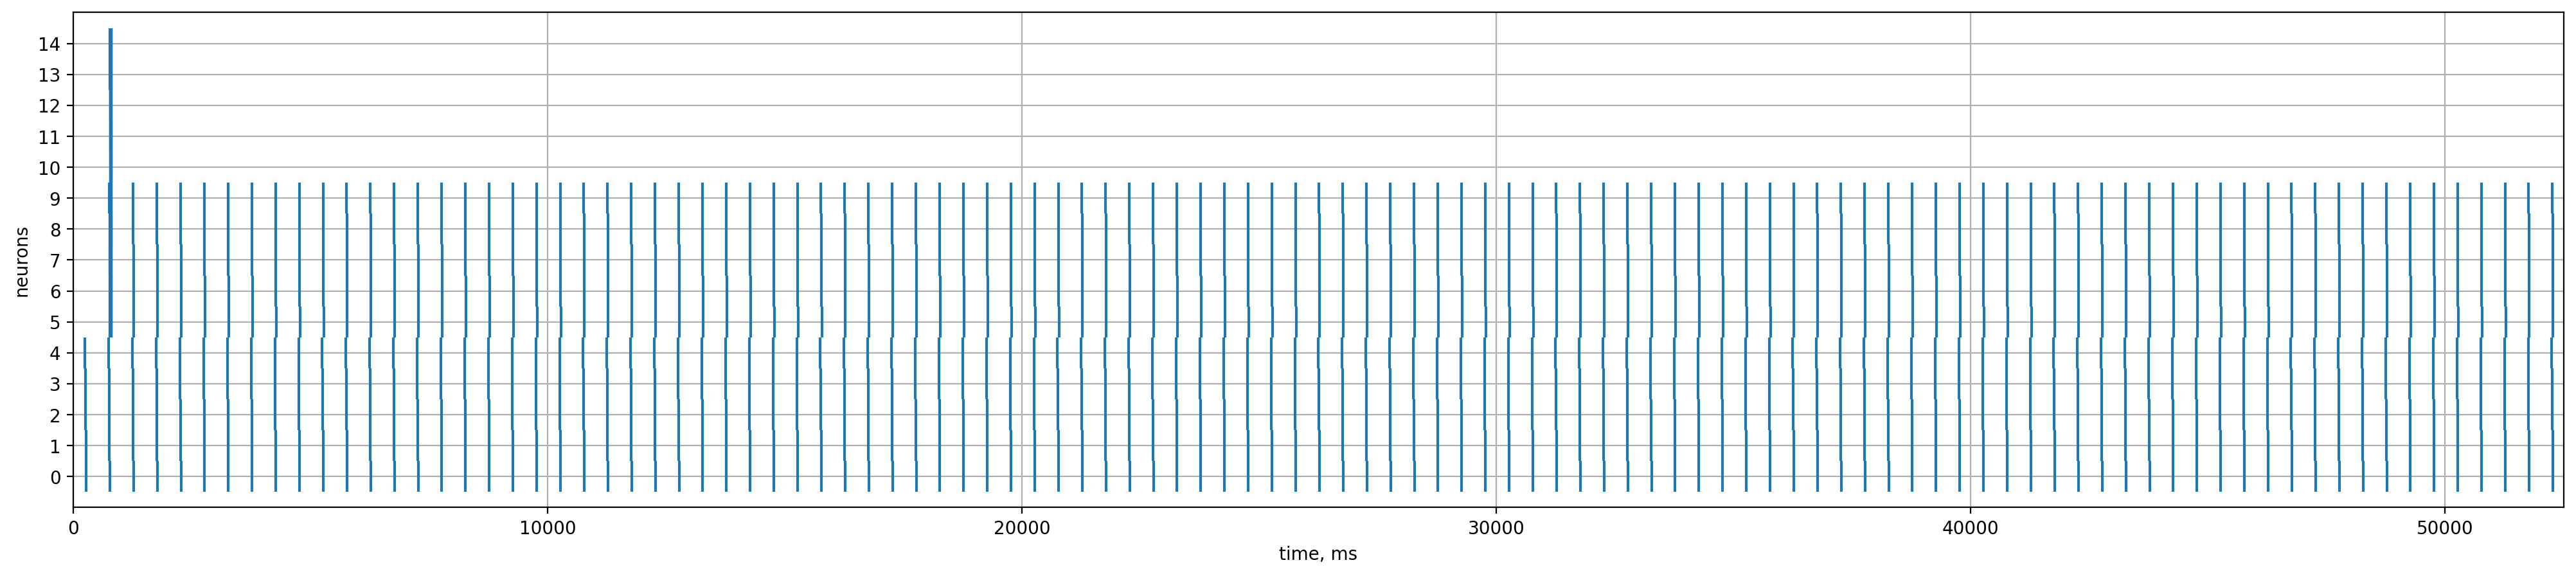

In [68]:
#stimulus_size = 5
#refresh_time = 150
#aw = 4

time = 52500

def reverse_signal(model, stimulus_size=5):
    timings = []
    for i in range(stimulus_size):
        timings.append(model[i].awaiting_time)
    for i in range(stimulus_size):
        model[i].awaiting_time = timings[stimulus_size - i - 1]

#model = fc_coder(stimulus_size=5, refresh_time=refresh_time, aw=aw)
#model.set_scale(3.9)
model.syn_by_edge[1,6].w = 1
model.syn_by_edge[2,7].w = 1
model.syn_by_edge[3,8].w = 1
model.set_rule_to_all('t_stdp')
gatherer = Gatherer(model)
#model.syn_by_edge[0,5].w = 1
for i in range(int(time / res)):
    model.tick()
    gatherer.gather_spikes_only()
    if i % model[0].refresh_time == 0:
        reverse_signal(model, 5)

data = gatherer.convert_spikes_for_raster()


gatherer.draw_raster(time=time)

In [118]:
model = load_model('models/apparent_2.pkl')

Loaded the following model:
{'Neurons': {0: <neurons.Spikes_at_will object at 0x0000019AE4AC5550>, 1: <neurons.Spikes_at_will object at 0x0000019AE3A938D0>, 2: <neurons.Spikes_at_will object at 0x0000019AE4AC4FD0>, 3: <neurons.Spikes_at_will object at 0x0000019AE4AC6F90>, 4: <neurons.Spikes_at_will object at 0x0000019AE4AC5ED0>, 5: <neurons.Izhikevich object at 0x0000019ADFE7F010>, 6: <neurons.Izhikevich object at 0x0000019AE03DA250>, 7: <neurons.Izhikevich object at 0x0000019ADFE92090>, 8: <neurons.Izhikevich object at 0x0000019ADFE90DD0>, 9: <neurons.Izhikevich object at 0x0000019ADFE935D0>, 10: <neurons.Izhikevich object at 0x0000019ADFE92510>, 11: <neurons.Izhikevich object at 0x0000019ADC3EE890>, 12: <neurons.Izhikevich object at 0x0000019ADC9AA450>, 13: <neurons.Izhikevich object at 0x0000019AE4F34790>, 14: <neurons.Izhikevich object at 0x0000019AE011E8D0>}, 'Synapses': {(0, 5): <synaptics.Synapse object at 0x0000019AE011C750>, (1, 6): <synaptics.Synapse object at 0x0000019ADFEB9

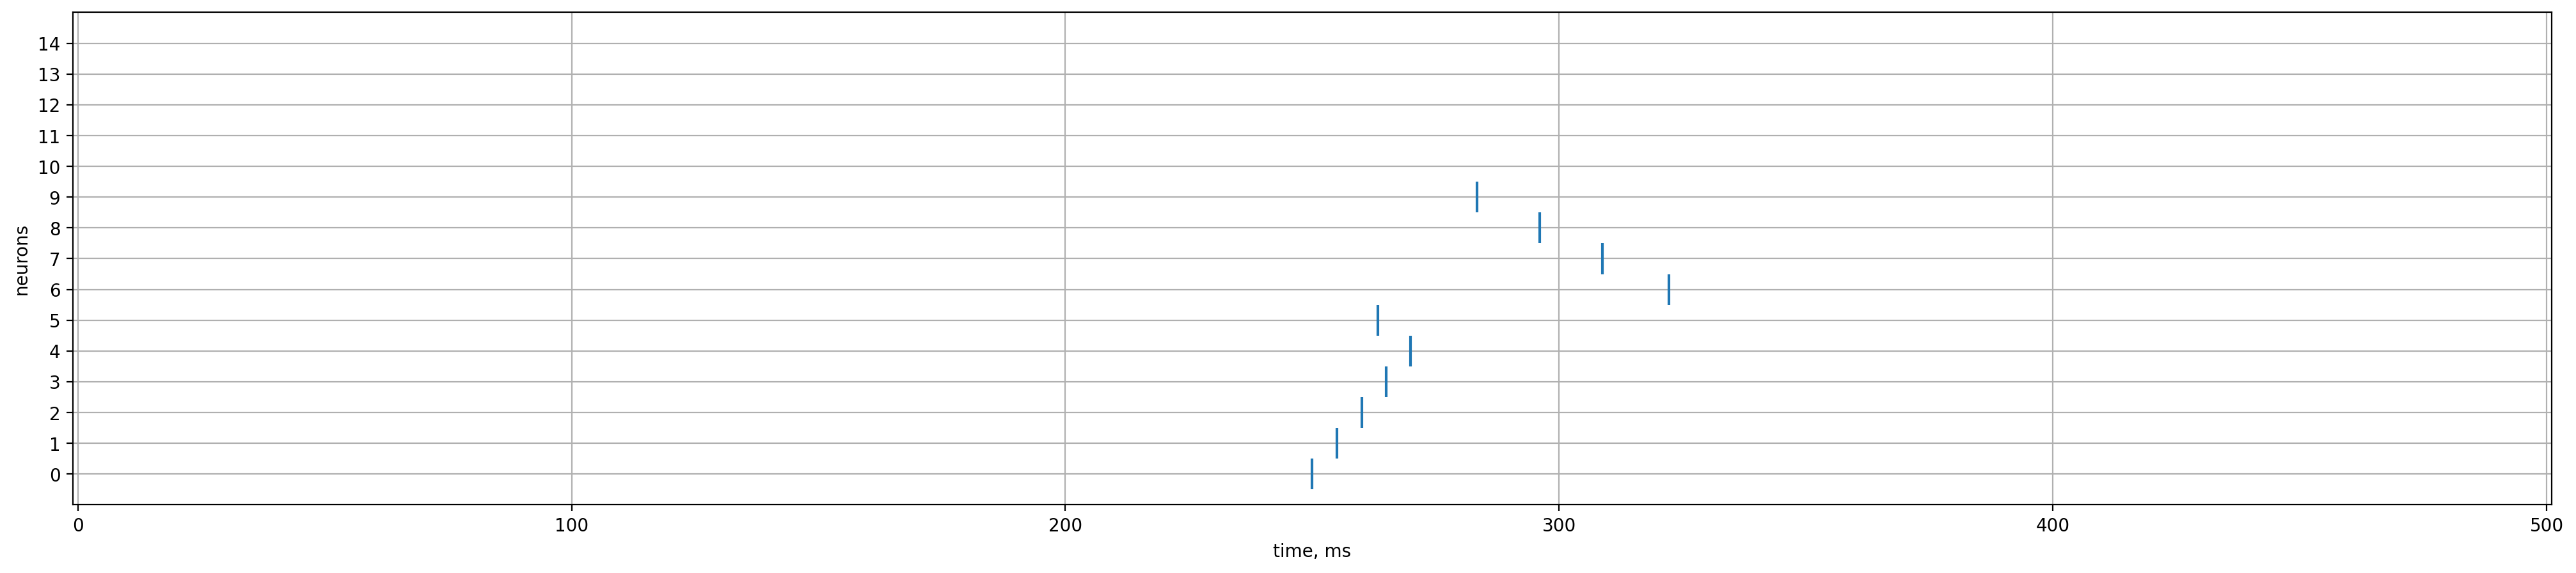

In [123]:
time = 500


model.syn_by_edge[1,6].w = 0
model.syn_by_edge[2,7].w = 0
model.syn_by_edge[3,8].w = 0
#model.set_scale(3.9)
model.set_rule_to_all(None)
reverse_signal(model)
gatherer = Gatherer(model)
for i in range(int(time / res)):
    model.tick()
    gatherer.gather_spikes_only()
data = gatherer.convert_spikes_for_raster()

gatherer.draw_raster(time=time)

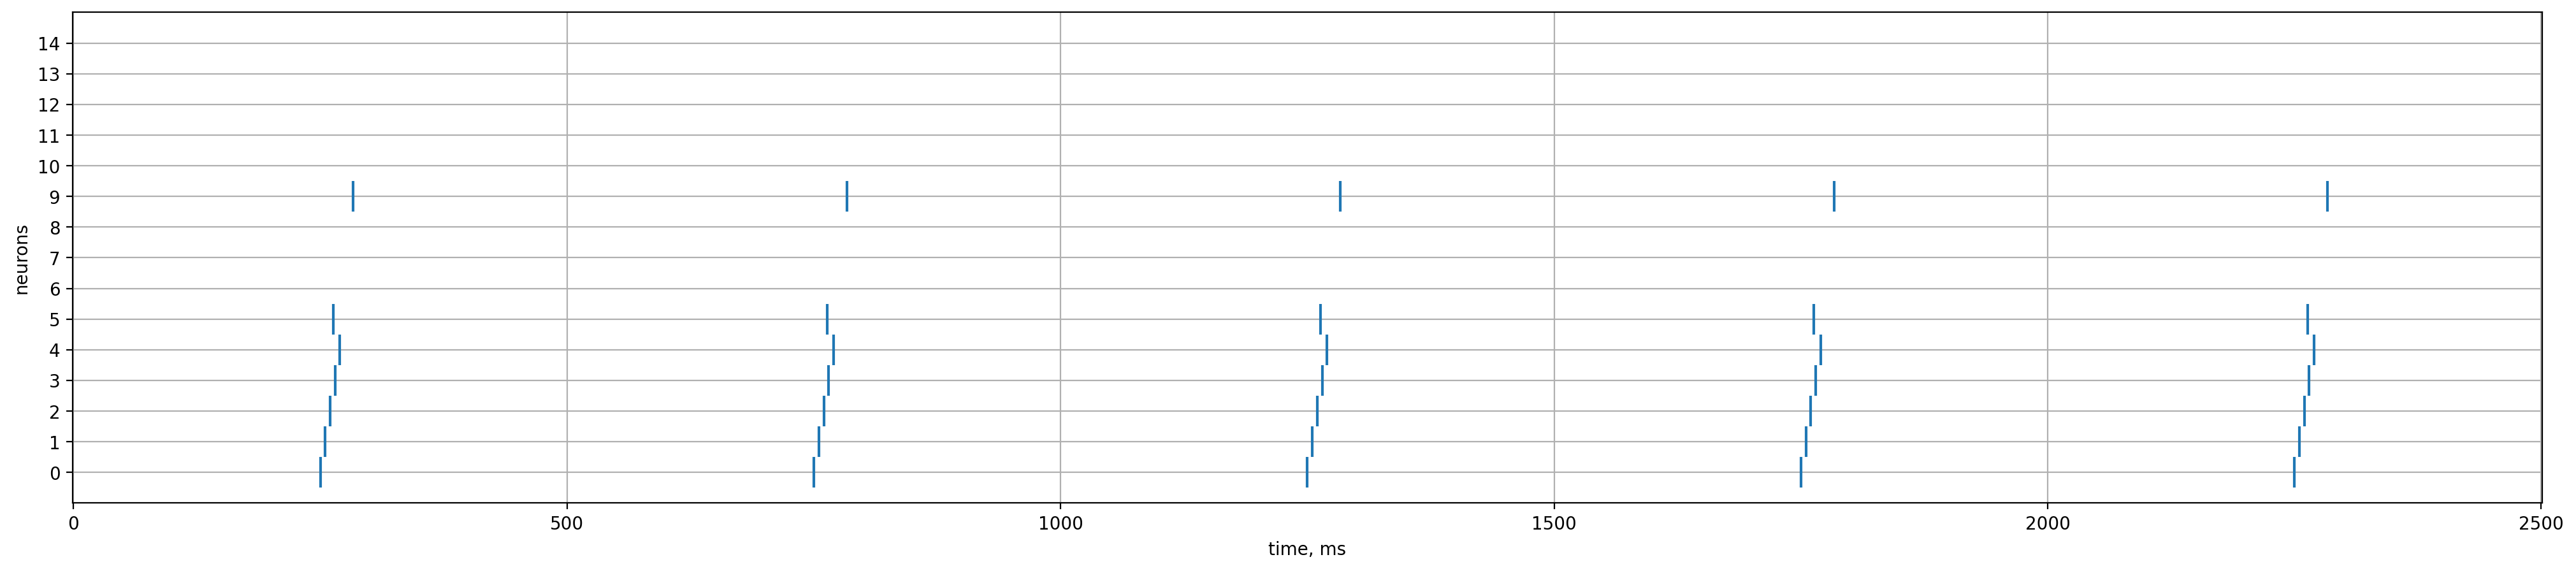

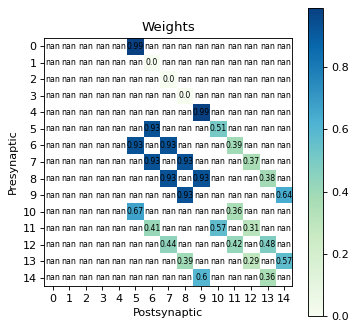

In [116]:
#for i in range(5):
#    model[4-i].awaiting_time = i*24
#print(model[1].awaiting_time)


time = 2500

reverse_signal(model)
layer_w = .93
model.syn_by_edge[1,6].w = 0
model.syn_by_edge[2,7].w = 0
model.syn_by_edge[3,8].w = 0


model.syn_by_edge[5,6].w = layer_w
model.syn_by_edge[6,7].w = layer_w
model.syn_by_edge[7,8].w = layer_w
model.syn_by_edge[8,9].w = layer_w
model.syn_by_edge[6,5].w = layer_w
model.syn_by_edge[7,6].w = layer_w
model.syn_by_edge[8,7].w = layer_w
model.syn_by_edge[9,8].w = layer_w
# model.set_scale(5.1)
#model.set_rule_to_all(None)
gatherer = Gatherer(model)
for i in range(int(time / res)):
    model.tick()
    gatherer.gather_spikes_only()
data = gatherer.convert_spikes_for_raster()

gatherer.draw_raster(time=time)

draw_weight_matrix(model)

In [81]:
#save_model(model, 'models/apparent_3.pkl')

Model saved at models/apparent_2.pkl
